# NLP BB v.1
## Сначала импортируем все библиотеки + функции, написанные ранее.

In [8]:
import codecs
import collections
import requests
import sys
#  import utils
import datetime
from pymystem3 import Mystem
import re
import pandas as pd
import html2text

replace_list = ["|","?",".", "!" ,",", "\"","\\", "-","/", ":", ";",  "â€œ", "â€˜", "*", ">", "—", """[""", "]", "_", "+",  "✔",')','('] 



def replace_other(text):
    """This function replace all not necessary symbols in the text"""
    for i in replace_list:
        text = text.replace(i, " ")

    return (text)

def handle_text(text):
    """This function handle text and make it in the good format"""
    h = html2text.HTML2Text()
    h.ignore_links = True
    h.escape_all = True
    text = h.handle(text)
    text = replace_other(text)
    return (text)

def analyze_text(text):
    RU = Mystem()
    lemmas = RU.lemmatize(text)
    analysis = RU.analyze(text)
    type_pattern = re.compile("^([A-Z]+)*")
    
    while (' ' in lemmas) == True: # очистили от пробелов
        lemmas.remove(' ')

    while ({'text': ' '} in analysis) == True: # очистили от пробелов
        analysis.remove({'text': ' '})

    while ({'text': '\n'} in analysis) == True: # очистили от \n
        analysis.remove({'text': '\n'})
    return (lemmas, analysis)

## Открываем свежую Excel(ку)

In [21]:
df = pd.read_excel ('Comments_v.7.xlsx')
print (df.head())

   Number Author_name               Href_user         Post_data  \
0       0     Наталья        None_main_author     8 часов назад   
1       1        Вера    /user/lenta/oksdekor  22 ноября, 15:42   
2       2    Гермиона   /user/lenta/id2342813  22 ноября, 15:30   
3       3     Мамочка   /user/lenta/id2188627  22 ноября, 14:35   
4       4     Наталья  /user/lenta/tati131086  22 ноября, 15:05   

                                           Href_post    Geography_user  \
0  https://www.babyblog.ru/community/post/concept...         None_main   
1  https://www.babyblog.ru/community/post/concept...    Россия, Рязань   
2  https://www.babyblog.ru/community/post/concept...    Россия, Липецк   
3  https://www.babyblog.ru/community/post/concept...      Россия, Мама   
4  https://www.babyblog.ru/community/post/concept...  Россия, Белгород   

                                           Full text  
0  \nПривет девочки! Сегодня делала УЗИ, все отли...  
1  Дюфастон на рост эндометрия не влияет! 

## Объединяем весь столбец в 1 текстик (удобно для скармливания Яндексу)

In [23]:
df["Full text"] = df["Full text"].astype(str)
text = df["Full text"].str.cat(sep=' ')
# text [:1000]

text = handle_text(text)
text = re.sub('[a-z]', ' ', text)
text = re.sub('[A-Z]', ' ', text)
text = re.sub('[0-9]', ' ', text)
text = text.replace("\n!", " ")
text = text.replace("\n", " ")
print (text[:1000])

# в функцию необходимо добавить фильтр по длине слов (нам нужно >3)

Привет девочки  Сегодня делала УЗИ  все отлично  цикл прям по часам и О тоже по плану  но меня растроило что эндометрий  мм  врач сказала маловат и назначила дюфастон с    дня по     Кто пил его так же  И помогает ли он  Я просто где то прочитала  что в каком то случае он дает эффект противозачаточных   Очень хотим лялечку 😔😔 Дюфастон на рост эндометрия не влияет  Это прогестерон а не эстроген Я по такой же схеме пила  как вам назначили  Б получилась  но замерла  но это уже не от дюфастона  На какой дц у Вас обычно О  Я только   цикл начала следить за О  в прошлый была на       дц  в этот по узи тоже примерно на       так а эндик значит уже не смотрели в день самой О жаль нужно глянуть чтобы точно знать  С   дц к      дц он вполне может прекрасно нарасти А на    дц не поздно будет посмотреть  У нас в выходные узи не работает Дюфастон насколько я знаю с эндиком никак не связан он нужен при недостатке прогестерона мне Г назначила дивигель для роста эндика и он растет В первую беременност

In [24]:
list_text = text.split()
lemmas = []
analysis = []
count = 0

print (len(list_text))

while count < len(list_text):  # скармиливаю по чуть-чуть, чтобы комп справлялся
    text_new = ' '.join(list_text [count:count+500])
    count += 500
    print (count/len(list_text)*100)
    lemmas_1, analysis_1 = analyze_text (text_new)
    lemmas = lemmas + lemmas_1
    analysis = analysis + analysis_1
    

text_new = ' '.join(list_text [count:len(list_text)])
lemmas_1, analysis_1 = analyze_text (text_new)
lemmas = lemmas + lemmas_1
analysis = analysis + analysis_1

print ('It has done')

4771966
0.010477861745033389
0.020955723490066778
0.03143358523510017
0.041911446980133556
0.05238930872516694
0.06286717047020034
0.07334503221523372
0.08382289396026711
0.0943007557053005
0.10477861745033389
0.11525647919536727
0.12573434094040067
0.13621220268543405
0.14669006443046745
0.15716792617550085
0.16764578792053422
0.1781236496655676
0.188601511410601
0.1990793731556344
0.20955723490066777
0.22003509664570114
0.23051295839073455
0.24099082013576795
0.25146868188080135
0.26194654362583475
0.2724244053708681
0.2829022671159015
0.2933801288609349
0.30385799060596824
0.3143358523510017
0.32481371409603504
0.33529157584106845
0.34576943758610185
0.3562472993311352
0.3667251610761686
0.377203022821202
0.3876808845662354
0.3981587463112688
0.40863660805630214
0.41911446980133554
0.4295923315463689
0.4400701932914023
0.45054805503643575
0.4610259167814691
0.4715037785265025
0.4819816402715359
0.49245950201656924
0.5029373637616027
0.5134152255066361
0.5238930872516695
0.5343709489

4.610259167814691
4.6207370295597245
4.631214891304758
4.641692753049791
4.652170614794825
4.662648476539858
4.6731263382848915
4.683604200029925
4.694082061774958
4.704559923519992
4.715037785265025
4.7255156470100586
4.735993508755092
4.746471370500125
4.756949232245159
4.767427093990192
4.777904955735226
4.788382817480259
4.798860679225292
4.809338540970325
4.819816402715358
4.830294264460392
4.840772126205425
4.8512499879504585
4.861727849695492
4.872205711440525
4.882683573185559
4.893161434930592
4.9036392966756255
4.914117158420659
4.924595020165692
4.935072881910726
4.94555074365576
4.956028605400793
4.966506467145827
4.97698432889086
4.987462190635894
4.997940052380927
5.00841791412596
5.018895775870994
5.029373637616027
5.039851499361061
5.050329361106094
5.0608072228511265
5.07128508459616
5.081762946341193
5.092240808086227
5.10271866983126
5.1131965315762935
5.123674393321327
5.13415225506636
5.144630116811394
5.155107978556427
5.1655858403014605
5.176063702046494
5.186541

9.388164123549917
9.39864198529495
9.409119847039983
9.419597708785018
9.43007557053005
9.440553432275085
9.451031294020117
9.461509155765151
9.471987017510184
9.482464879255218
9.49294274100025
9.503420602745285
9.513898464490318
9.524376326235352
9.534854187980384
9.545332049725417
9.555809911470451
9.566287773215484
9.576765634960518
9.58724349670555
9.597721358450585
9.608199220195617
9.61867708194065
9.629154943685684
9.639632805430717
9.65011066717575
9.660588528920783
9.671066390665818
9.68154425241085
9.692022114155884
9.702499975900917
9.712977837645951
9.723455699390984
9.733933561136018
9.74441142288105
9.754889284626085
9.765367146371117
9.775845008116152
9.786322869861184
9.796800731606218
9.807278593351251
9.817756455096285
9.828234316841318
9.838712178586352
9.849190040331385
9.859667902076419
9.870145763821451
9.880623625566486
9.89110148731152
9.901579349056552
9.912057210801587
9.92253507254662
9.933012934291654
9.943490796036686
9.95396865778172
9.964446519526753
9.9

13.998423291364606
14.00890115310964
14.019379014854675
14.029856876599709
14.04033473834474
14.050812600089774
14.061290461834808
14.071768323579843
14.082246185324873
14.092724047069908
14.103201908814942
14.113679770559976
14.124157632305009
14.134635494050041
14.145113355795075
14.15559121754011
14.166069079285142
14.176546941030175
14.187024802775209
14.197502664520242
14.207980526265276
14.218458388010308
14.228936249755343
14.239414111500375
14.24989197324541
14.260369834990442
14.270847696735474
14.281325558480509
14.291803420225543
14.302281281970576
14.312759143715608
14.323237005460642
14.333714867205677
14.344192728950707
14.354670590695742
14.365148452440776
14.37562631418581
14.386104175930841
14.396582037675875
14.40705989942091
14.417537761165944
14.428015622910975
14.438493484656009
14.448971346401043
14.459449208146077
14.469927069891108
14.480404931636143
14.490882793381177
14.501360655126211
14.511838516871242
14.522316378616276
14.53279424036131
14.543272102106345


18.58772673568923
18.598204597434265
18.6086824591793
18.619160320924333
18.629638182669364
18.6401160444144
18.650593906159433
18.661071767904467
18.671549629649498
18.682027491394532
18.692505353139566
18.7029832148846
18.71346107662963
18.723938938374665
18.7344168001197
18.744894661864734
18.755372523609765
18.7658503853548
18.776328247099833
18.786806108844868
18.7972839705899
18.807761832334933
18.818239694079967
18.828717555825
18.839195417570036
18.849673279315066
18.8601511410601
18.870629002805135
18.88110686455017
18.8915847262952
18.902062588040234
18.91254044978527
18.923018311530303
18.933496173275334
18.943974035020368
18.954451896765402
18.964929758510436
18.975407620255467
18.9858854820005
18.996363343745536
19.00684120549057
19.0173190672356
19.027796928980635
19.03827479072567
19.048752652470704
19.059230514215734
19.06970837596077
19.080186237705803
19.090664099450834
19.101141961195868
19.111619822940902
19.122097684685933
19.132575546430967
19.143053408176
19.1535

23.208463765248958
23.21894162699399
23.229419488739023
23.239897350484057
23.25037521222909
23.260853073974122
23.271330935719156
23.28180879746419
23.292286659209225
23.302764520954256
23.31324238269929
23.323720244444324
23.33419810618936
23.34467596793439
23.355153829679423
23.365631691424458
23.376109553169492
23.386587414914523
23.397065276659557
23.40754313840459
23.418021000149626
23.428498861894656
23.43897672363969
23.449454585384725
23.45993244712976
23.47041030887479
23.480888170619824
23.49136603236486
23.501843894109893
23.512321755854924
23.522799617599958
23.533277479344992
23.543755341090026
23.55423320283506
23.56471106458009
23.575188926325126
23.58566678807016
23.596144649815194
23.606622511560225
23.61710037330526
23.627578235050294
23.638056096795328
23.64853395854036
23.659011820285393
23.669489682030427
23.67996754377546
23.690445405520492
23.700923267265527
23.71140112901056
23.72187899075559
23.732356852500626
23.74283471424566
23.75331257599069
23.76379043773

27.829200794808678
27.839678656553712
27.850156518298746
27.86063438004378
27.871112241788815
27.88159010353385
27.892067965278883
27.902545827023918
27.913023688768945
27.92350155051398
27.933979412259013
27.944457274004048
27.954935135749082
27.965412997494116
27.97589085923915
27.986368720984185
27.996846582729212
28.007324444474246
28.01780230621928
28.028280167964315
28.03875802970935
28.049235891454384
28.059713753199418
28.070191614944452
28.08066947668948
28.091147338434514
28.101625200179548
28.112103061924582
28.122580923669616
28.13305878541465
28.143536647159685
28.15401450890472
28.164492370649747
28.17497023239478
28.185448094139815
28.19592595588485
28.206403817629884
28.216881679374918
28.227359541119952
28.237837402864983
28.248315264610017
28.258793126355048
28.269270988100082
28.279748849845117
28.29022671159015
28.300704573335185
28.31118243508022
28.32166029682525
28.332138158570285
28.342616020315315
28.35309388206035
28.363571743805384
28.374049605550418
28.38452

32.449937824368405
32.460415686113436
32.47089354785847
32.481371409603504
32.49184927134854
32.50232713309357
32.5128049948386
32.52328285658364
32.53376071832867
32.5442385800737
32.55471644181874
32.56519430356377
32.5756721653088
32.58615002705384
32.59662788879887
32.60710575054391
32.61758361228894
32.62806147403397
32.638539335779
32.64901719752404
32.65949505926907
32.66997292101411
32.68045078275914
32.690928644504176
32.70140650624921
32.71188436799424
32.72236222973927
32.732840091484306
32.74331795322934
32.753795814974374
32.764273676719405
32.77475153846444
32.785229400209474
32.795707261954504
32.806185123699535
32.81666298544457
32.827140847189604
32.83761870893464
32.84809657067967
32.85857443242471
32.86905229416974
32.87953015591477
32.8900080176598
32.90048587940484
32.91096374114987
32.92144160289491
32.93191946463994
32.94239732638498
32.95287518813001
32.963353049875046
32.97383091162007
32.98430877336511
32.99478663511014
33.005264496855176
33.01574235860021
33.

37.1544977478884
37.16497560963343
37.17545347137846
37.1859313331235
37.19640919486853
37.20688705661356
37.2173649183586
37.22784278010363
37.23832064184867
37.2487985035937
37.25927636533873
37.269754227083766
37.2802320888288
37.29070995057383
37.301187812318865
37.311665674063896
37.322143535808934
37.332621397553964
37.343099259298995
37.353577121044026
37.364054982789064
37.374532844534095
37.38501070627913
37.39548856802416
37.4059664297692
37.41644429151423
37.42692215325926
37.43740001500429
37.44787787674933
37.45835573849436
37.4688336002394
37.47931146198443
37.48978932372947
37.5002671854745
37.51074504721953
37.52122290896456
37.5317007707096
37.54217863245463
37.55265649419967
37.5631343559447
37.573612217689735
37.584090079434766
37.5945679411798
37.60504580292483
37.615523664669865
37.626001526414896
37.636479388159934
37.646957249904965
37.65743511165
37.66791297339503
37.67839083514007
37.688868696885095
37.69934655863013
37.70982442037516
37.7203022821202
37.730780

41.880013394898455
41.890491256643486
41.90096911838852
41.911446980133555
41.921924841878585
41.93240270362362
41.942880565368654
41.95335842711369
41.96383628885872
41.97431415060375
41.984792012348784
41.99526987409382
42.00574773583885
42.01622559758389
42.02670345932892
42.03718132107396
42.04765918281899
42.05813704456402
42.06861490630905
42.07909276805409
42.08957062979912
42.10004849154416
42.11052635328919
42.121004215034226
42.13148207677926
42.14195993852429
42.15243780026932
42.162915662014356
42.17339352375939
42.183871385504425
42.194349247249455
42.20482710899449
42.215304970739524
42.225782832484555
42.236260694229586
42.24673855597462
42.257216417719654
42.26769427946469
42.27817214120972
42.28865000295476
42.29912786469979
42.30960572644482
42.32008358818985
42.33056144993489
42.34103931167992
42.35151717342496
42.36199503516999
42.37247289691503
42.38295075866006
42.393428620405096
42.40390648215012
42.41438434389516
42.42486220564019
42.435340067385226
42.445817929

46.60552904190851
46.61600690365354
46.62648476539858
46.63696262714361
46.64744048888865
46.65791835063368
46.66839621237872
46.67887407412375
46.68935193586878
46.69982979761381
46.71030765935885
46.72078552110388
46.731263382848915
46.741741244593946
46.752219106338984
46.762696968084015
46.773174829829046
46.783652691574076
46.794130553319114
46.804608415064145
46.81508627680918
46.82556413855421
46.83604200029925
46.84651986204428
46.85699772378931
46.86747558553434
46.87795344727938
46.88843130902441
46.89890917076945
46.90938703251448
46.91986489425952
46.93034275600455
46.94082061774958
46.95129847949461
46.96177634123965
46.97225420298468
46.98273206472972
46.99320992647475
47.003687788219786
47.014165649964816
47.02464351170985
47.03512137345488
47.045599235199916
47.05607709694495
47.066554958689984
47.077032820435015
47.08751068218005
47.097988543925084
47.10846640567012
47.118944267415145
47.12942212916018
47.139899990905214
47.15037785265025
47.16085571439528
47.171333576

51.32056682717354
51.33104468891857
51.34152255066361
51.352000412408636
51.362478274153666
51.372956135898704
51.383433997643735
51.39391185938877
51.4043897211338
51.41486758287884
51.42534544462387
51.43582330636891
51.44630116811394
51.456779029858964
51.46725689160401
51.47773475334903
51.48821261509408
51.4986904768391
51.509168338584146
51.51964620032917
51.5301240620742
51.54060192381924
51.55107978556427
51.56155764730931
51.57203550905434
51.582513370799376
51.592991232544406
51.603469094289444
51.613946956034475
51.6244248177795
51.634902679524544
51.64538054126957
51.65585840301461
51.666336264759636
51.67681412650468
51.687291988249704
51.697769849994735
51.70824771173977
51.718725573484804
51.72920343522984
51.73968129697487
51.75015915871991
51.76063702046494
51.77111488220998
51.78159274395501
51.79207060570003
51.80254846744508
51.8130263291901
51.82350419093515
51.83398205268017
51.844459914425215
51.85493777617024
51.86541563791528
51.87589349966031
51.88637136140534

56.02512675069353
56.03560461243856
56.0460824741836
56.05656033592863
56.06703819767367
56.0775160594187
56.08799392116373
56.09847178290877
56.10894964465379
56.119427506398836
56.12990536814386
56.140383229888904
56.15086109163393
56.16133895337896
56.171816815124
56.18229467686903
56.192772538614065
56.203250400359096
56.213728262104134
56.224206123849164
56.2346839855942
56.24516184733923
56.25563970908426
56.2661175708293
56.276595432574325
56.28707329431937
56.297551156064394
56.30802901780944
56.31850687955446
56.32898474129949
56.33946260304453
56.34994046478956
56.3604183265346
56.37089618827963
56.38137405002467
56.3918519117697
56.40232977351474
56.41280763525977
56.42328549700479
56.433763358749836
56.44424122049486
56.454719082239905
56.46519694398493
56.475674805729966
56.486152667475
56.496630529220035
56.507108390965065
56.517586252710096
56.528064114455134
56.538541976200165
56.5490198379452
56.55949769969023
56.56997556143527
56.5804534231803
56.590931284925325
56.60

60.750642397703594
60.76112025944862
60.77159812119366
60.782075982938686
60.79255384468372
60.803031706428754
60.813509568173785
60.82398742991882
60.834465291663854
60.84494315340889
60.85542101515392
60.86589887689896
60.87637673864399
60.886854600389015
60.89733246213406
60.90781032387908
60.91828818562413
60.92876604736915
60.9392439091142
60.94972177085922
60.96019963260425
60.97067749434929
60.98115535609432
60.99163321783936
61.00211107958439
61.012588941329426
61.02306680307446
61.033544664819495
61.044022526564525
61.05450038830955
61.064978250054594
61.07545611179962
61.08593397354466
61.096411835289686
61.10688969703473
61.117367558779755
61.127845420524785
61.13832328226982
61.148801144014854
61.15927900575989
61.16975686750492
61.18023472924996
61.19071259099499
61.20119045274003
61.21166831448506
61.22214617623008
61.23262403797513
61.24310189972015
61.25357976146519
61.26405762321022
61.27453548495526
61.28501334670029
61.29549120844533
61.30596907019036
61.316446931935

65.50759162994875
65.51806949169378
65.52854735343881
65.53902521518384
65.54950307692889
65.55998093867392
65.57045880041895
65.58093666216398
65.59141452390901
65.60189238565405
65.61237024739907
65.62284810914412
65.63332597088915
65.64380383263419
65.65428169437921
65.66475955612425
65.67523741786928
65.68571527961431
65.69619314135934
65.70667100310438
65.71714886484942
65.72762672659445
65.73810458833948
65.74858245008451
65.75906031182954
65.76953817357459
65.7800160353196
65.79049389706465
65.80097175880968
65.81144962055473
65.82192748229974
65.83240534404479
65.84288320578982
65.85336106753485
65.86383892927988
65.87431679102491
65.88479465276995
65.89527251451499
65.90575037626002
65.91622823800505
65.92670609975009
65.93718396149512
65.94766182324014
65.95813968498518
65.96861754673021
65.97909540847525
65.98957327022028
66.00005113196532
66.01052899371035
66.02100685545538
66.03148471720041
66.04196257894544
66.05244044069049
66.06291830243552
66.07339616418055
66.08387402

70.32740803266411
70.33788589440914
70.34836375615417
70.3588416178992
70.36931947964425
70.37979734138928
70.3902752031343
70.40075306487934
70.41123092662437
70.42170878836941
70.43218665011443
70.44266451185948
70.4531423736045
70.46362023534954
70.47409809709457
70.4845759588396
70.49505382058464
70.50553168232967
70.5160095440747
70.52648740581974
70.53696526756478
70.54744312930981
70.55792099105483
70.56839885279987
70.5788767145449
70.58935457628994
70.59983243803497
70.61031029978001
70.62078816152504
70.63126602327007
70.6417438850151
70.65222174676013
70.66269960850518
70.67317747025021
70.68365533199524
70.69413319374027
70.70461105548532
70.71508891723035
70.72556677897538
70.73604464072041
70.74652250246544
70.75700036421047
70.7674782259555
70.77795608770055
70.78843394944558
70.7989118111906
70.80938967293564
70.81986753468067
70.83034539642571
70.84082325817074
70.85130111991577
70.8617789816608
70.87225684340585
70.88273470515088
70.89321256689591
70.90369042864094
70

75.13674657363443
75.14722443537947
75.1577022971245
75.16818015886953
75.17865802061456
75.1891358823596
75.19961374410464
75.21009160584966
75.2205694675947
75.23104732933973
75.24152519108476
75.25200305282979
75.26248091457484
75.27295877631987
75.2834366380649
75.29391449980993
75.30439236155496
75.3148702233
75.32534808504504
75.33582594679007
75.3463038085351
75.35678167028014
75.36725953202517
75.37773739377019
75.38821525551523
75.39869311726027
75.4091709790053
75.41964884075033
75.43012670249537
75.4406045642404
75.45108242598543
75.46156028773046
75.4720381494755
75.48251601122054
75.49299387296557
75.5034717347106
75.51394959645563
75.52442745820068
75.5349053199457
75.54538318169072
75.55586104343577
75.5663389051808
75.57681676692583
75.58729462867086
75.5977724904159
75.60825035216094
75.61872821390597
75.629206075651
75.63968393739603
75.65016179914107
75.66063966088609
75.67111752263114
75.68159538437617
75.69207324612121
75.70255110786623
75.71302896961126
75.7235068

79.94608511460476
79.95656297634979
79.96704083809483
79.97751869983986
79.98799656158488
79.99847442332992
80.00895228507495
80.01943014681999
80.02990800856502
80.04038587031006
80.05086373205509
80.06134159380012
80.07181945554515
80.08229731729018
80.09277517903523
80.10325304078026
80.11373090252529
80.12420876427032
80.13468662601537
80.14516448776038
80.15564234950543
80.16612021125046
80.17659807299549
80.18707593474052
80.19755379648555
80.2080316582306
80.21850951997563
80.22898738172066
80.23946524346569
80.24994310521072
80.26042096695576
80.2708988287008
80.28137669044582
80.29185455219086
80.3023324139359
80.31281027568092
80.32328813742596
80.33376599917099
80.34424386091602
80.35472172266105
80.36519958440608
80.37567744615113
80.38615530789616
80.39663316964119
80.40711103138622
80.41758889313125
80.4280667548763
80.43854461662133
80.44902247836636
80.45950034011139
80.46997820185643
80.48045606360145
80.4909339253465
80.50141178709153
80.51188964883656
80.522367510581

84.76590151732012
84.77637937906515
84.78685724081019
84.79733510255521
84.80781296430024
84.81829082604528
84.82876868779032
84.83924654953535
84.84972441128038
84.86020227302542
84.87068013477045
84.88115799651548
84.89163585826051
84.90211372000554
84.91259158175059
84.92306944349562
84.93354730524065
84.94402516698568
84.95450302873073
84.96498089047574
84.97545875222077
84.98593661396582
84.99641447571085
85.00689233745588
85.01737019920091
85.02784806094596
85.03832592269099
85.04880378443602
85.05928164618105
85.06975950792608
85.08023736967112
85.09071523141614
85.10119309316119
85.11167095490622
85.12214881665126
85.13262667839628
85.14310454014131
85.15358240188635
85.16406026363138
85.17453812537642
85.18501598712145
85.19549384886649
85.20597171061152
85.21644957235655
85.22692743410158
85.23740529584661
85.24788315759166
85.25836101933668
85.26883888108172
85.27931674282675
85.2897946045718
85.30027246631681
85.31075032806184
85.32122818980689
85.33170605155192
85.34218391

89.58571792003548
89.59619578178051
89.60667364352554
89.61715150527057
89.6276293670156
89.63810722876065
89.64858509050568
89.65906295225071
89.66954081399574
89.68001867574077
89.69049653748581
89.70097439923083
89.71145226097588
89.7219301227209
89.73240798446595
89.74288584621097
89.75336370795601
89.76384156970104
89.77431943144607
89.7847972931911
89.79527515493614
89.80575301668118
89.81623087842621
89.82670874017124
89.83718660191627
89.8476644636613
89.85814232540635
89.86862018715136
89.87909804889641
89.88957591064144
89.90005377238649
89.9105316341315
89.92100949587655
89.93148735762158
89.94196521936661
89.95244308111164
89.96292094285667
89.97339880460171
89.98387666634675
89.99435452809178
90.0048323898368
90.01531025158185
90.02578811332688
90.0362659750719
90.04674383681694
90.05722169856197
90.06769956030702
90.07817742205204
90.08865528379708
90.09913314554211
90.10961100728714
90.12008886903217
90.1305667307772
90.14104459252225
90.15152245426728
90.16200031601231


94.3950564610058
94.40553432275082
94.41601218449587
94.4264900462409
94.43696790798593
94.44744576973096
94.457923631476
94.46840149322104
94.47887935496607
94.4893572167111
94.49983507845613
94.51031294020117
94.52079080194619
94.53126866369124
94.54174652543627
94.55222438718131
94.56270224892633
94.57318011067136
94.5836579724164
94.59413583416143
94.60461369590647
94.6150915576515
94.62556941939654
94.63604728114157
94.6465251428866
94.65700300463163
94.66748086637666
94.67795872812171
94.68843658986673
94.69891445161177
94.7093923133568
94.71987017510185
94.73034803684686
94.7408258985919
94.75130376033694
94.76178162208197
94.772259483827
94.78273734557203
94.79321520731708
94.8036930690621
94.81417093080714
94.82464879255217
94.8351266542972
94.84560451604224
94.85608237778726
94.8665602395323
94.87703810127734
94.88751596302237
94.8979938247674
94.90847168651243
94.91894954825747
94.9294274100025
94.93990527174753
94.95038313349256
94.96086099523761
94.97133885698264
94.981816

99.20439500197612
99.21487286372115
99.22535072546619
99.23582858721123
99.24630644895626
99.25678431070129
99.26726217244632
99.27774003419135
99.2882178959364
99.29869575768141
99.30917361942646
99.31965148117149
99.33012934291654
99.34060720466155
99.3510850664066
99.36156292815163
99.37204078989666
99.38251865164169
99.39299651338672
99.40347437513176
99.4139522368768
99.42443009862183
99.43490796036686
99.4453858221119
99.45586368385693
99.46634154560195
99.476819407347
99.48729726909202
99.49777513083706
99.50825299258209
99.51873085432713
99.52920871607216
99.53968657781719
99.55016443956222
99.56064230130725
99.5711201630523
99.58159802479733
99.59207588654236
99.60255374828739
99.61303161003244
99.62350947177747
99.63398733352248
99.64446519526753
99.65494305701256
99.66542091875759
99.67589878050262
99.68637664224767
99.6968545039927
99.70733236573773
99.71781022748276
99.72828808922779
99.73876595097283
99.74924381271786
99.7597216744629
99.77019953620793
99.78067739795297
9

In [33]:
list_right_words = []
list_right_words_1 = []
stop_words = ["уже","ещё","затем","еще","также","раз"]
for i in range(len(analysis)):
    if ((str(analysis [i])[2:6]) != 'text' and ((not((analysis [i].get("analysis")))) == False)):
#             print (str(analysis [i]))
#             print ( (not((analysis [i].get("analysis")))) == False)
            s = (analysis [i].get("analysis")[0].get('gr'))
            part_speech = s.replace(',', ' ').split()[0]
            if '=' in part_speech:
                part_speech = part_speech [:part_speech.find("=")]
            if (part_speech == 'S'  or part_speech == 'A'): #or part_speech == 'A' or part_speech == 'ADV'    due to Nataly or part_speech == 'V'
                list_right_words.append (((analysis [i]).get("analysis")[0]).get('lex'))
#                 print (part_speech, '----',((analysis [i]).get("analysis")[0]).get('lex')) # ADV ---- часто
#             print (s)
for i in list_right_words:
    # ниже необходимо переписать в функцию и наверх !!!!
    if i not in stop_words:   
        list_right_words_1.append (i)
# my_file = open('BB_cloud' + '_pre' + '.txt', 'a', encoding='utf-16')
# my_file.write(text)
# my_file.close()

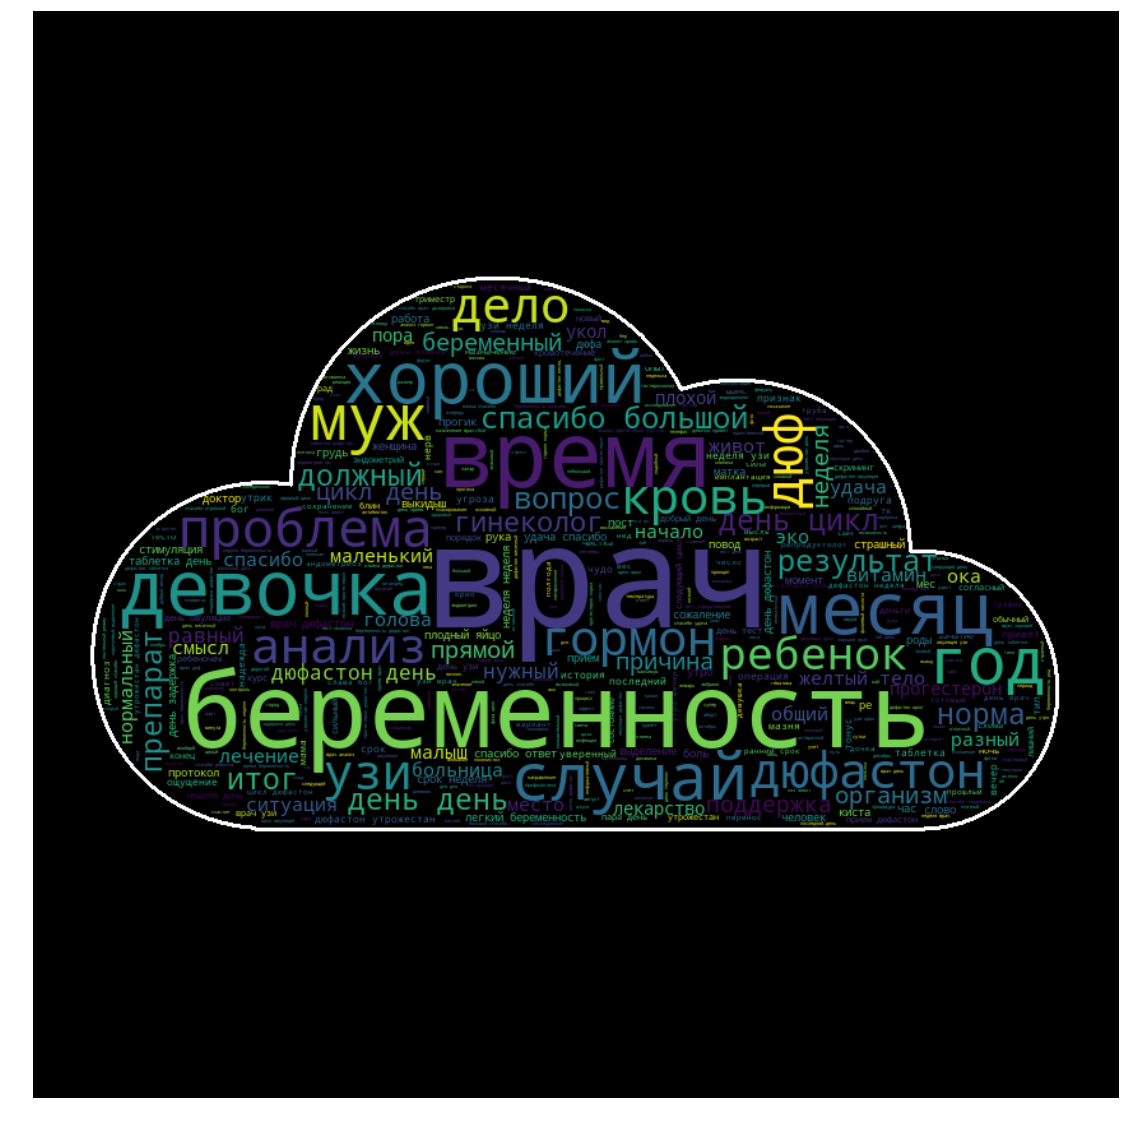

In [34]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
text = " ".join(review for review in list_right_words_1)

picture = "smile"
# wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white").generate(text)
# plt.figure(figsize=[20,20])
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
wine_mask = np.array(Image.open(picture + ".png"))
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
# Transform your mask into a new one that will work with the function:
# transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

# for i in range(len(wine_mask)):
#     transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
wc = WordCloud(background_color="black", max_words=5000, mask=wine_mask,
                contour_width=3, contour_color='white')
wc.generate(text)
plt.figure(figsize=[20,20])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('BB_cloud_v2' + ".png")

In [124]:
import collections

counter = collections.Counter(list_right_words_1)
# print(counter.most_common()[:10])
df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
df.sort_values(by=[0],ascending=False).reset_index()
df.to_excel("Popular_words.xlsx")

## Okay, let's define a good function for it (take it from task on Coursera HSE)

In [43]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pekhtdx\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [116]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

# STOPWORDS_ru = set(stopwords.words('russian'))
# print (len(list(STOPWORDS_ru))) # 151 слово в русском

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text
    text = REPLACE_BY_SPACE_RE.sub(" ", text)# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub("", text)# delete symbols which are in BAD_SYMBOLS_RE from text
    text_list = text.split(" ")
    text_list = [x for x in text_list if x != '']
    text = ' '.join([word for word in text_list if word not in stopwords.words('english')])# delete stopwords from text
    return text
def test_text_prepare():
    examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]
    answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"]
    for ex, ans in zip(examples, answers):
        if text_prepare(ex) != ans:
            return "Wrong answer for the case: '%s'" % text_prepare(ex)
    return 'Basic tests are passed.'


In [117]:
print(test_text_prepare())

sql server - any equivalent of excel's choose function?
sql server  any equivalent of excels choose function
how to free c++ memory vector<int> * arr?
how to free c++ memory vectorint  arr
Basic tests are passed.
